### Exploratory Data Analysis (EDA)
Explore the data to describe current farming practices, identify trends, and detect relationships between agronomic decisions and yield outcomes.”
  
1.What to analyze:
How much land is cultivated?

What soil types and drainage conditions exist?

How many farmers use organic vs. chemical fertilizers?

When do farmers transplant or harvest?

Descriptive Profiling of Farming Practices

2.EDA report with:
- Descriptive statistics.
- Visualizations of input use and yield patterns.
- Subgroup comparisons and trend analyses.
- Data quality assessment.

In [107]:
import pandas as pd
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import os

### 1.Descriptive statistics

We’ll start by calculating key summary statistics for the dataset you uploaded (Cleaned_data.csv):

Numeric variables: count, mean, std deviation, min, max, quartiles

Categorical variables: count of unique values and top frequent values

I'll now run the analysis on the file.

- Here's the summary of the descriptive statistics from your cleaned dataset:

Dataset Overview:
Total columns: 70

Numeric columns: 45

Categorical/text columns: 25

Sample rows shown: 3 (preview below)

- Descriptive Statistics for Numeric Columns (45 variables):
Includes:

count: number of non-missing entries

mean: average

std: standard deviation

min & max: range of values

25%, 50%, 75%: quartiles (spread of data)

- Summary of Categorical Columns (25 variables):
Includes:

count: number of non-missing entries

unique: number of unique values

top: most frequent category

freq: frequency of the top value


In [93]:
# Load the cleaned dataset
df = pd.read_csv(r"C:\Users\Ashulah\Downloads\data-rice-cultivation\data\Cleaned_data.csv")
df

district       block  record_id        farmer_id  \
0               Siwan   Pachrukhi      11048  202308080747453   
1               Siwan   Pachrukhi      12569  202308080801503   
2               Siwan   Pachrukhi      12485  202308080948183   
3               Siwan   Pachrukhi       9649  202308081818373   
4               Siwan   Pachrukhi      13111  202308091100453   
...               ...         ...        ...              ...   
24064  West_Champaran  Majhauliya      31773  202311021259343   
24065  West_Champaran  Majhauliya      31774  202311021259483   
24066  West_Champaran  Majhauliya      31775  202311021300233   
24067  West_Champaran  Majhauliya      31776  202311021300363   
24068  West_Champaran  Majhauliya      31777  202311021300523   

       total_cultivable_land_llu  land_under_rice_llu  \
0                           20.0                 20.0   
1                           15.0                 15.0   
2                           15.0                 15.0   
3                           20.0                 20.0   
4                           15.0                 15.0   
...                          ...                  ...   
24064                        5.0                  5.0   
24065                        5.0                  5.0   
24066                        5.0                  5.0   
24067                        5.0                  5.0   
24068                        5.0                  5.0   

       largest_rice_plot_area_llu drainage_class  soil_type previous_crop  \
0                           0.185        lowland  blacksoil         Wheat   
1                           0.148     mediumland   claysoil         Wheat   
2                           0.148         upland  sandysoil         Wheat   
3                           0.185     mediumland   claysoil         Wheat   
4                           0.185     mediumland   claysoil         Wheat   
...                           ...            ...        ...           ...   
24064                       5.000         upland  sandyloam         Wheat   
24065                       5.000         upland  sandyloam         Wheat   
24066                       5.000     mediumland  sandysoil         Wheat   
24067                       5.000         upland  sandyloam         Wheat   
24068                       5.000         upland  sandyloam         Wheat   

       ... weeding_times weeding_method harvest_month  harvest_week  \
0      ...           2.0         byHand    2023-11-01             2   
1      ...           2.0         byHand    2023-11-01             2   
2      ...           2.0         byHand    2023-11-01             1   
3      ...           2.0         byHand    2023-11-01             3   
4      ...           2.0         byHand    2023-11-01             3   
...    ...           ...            ...           ...           ...   
24064  ...           2.0         byHand    2023-10-01             2   
24065  ...           2.0         byHand    2023-10-01             2   
24066  ...           1.0         byHand    2023-10-01             2   
24067  ...           2.0         byHand    2023-10-01             2   
24068  ...           2.0         byHand    2023-10-01             2   

      harvest_method yield_kg  harvest_income_inr video_seen_flag  \
0             byHand    400.0               900.0             yes   
1             byHand    300.0               600.0             yes   
2             byHand    360.0               600.0             yes   
3             byHand    420.0               900.0             yes   
4             byHand    500.0              1200.0             yes   
...              ...      ...                 ...             ...   
24064         byHand    580.0               800.0             yes   
24065         byHand    600.0               800.0             yes   
24066         byHand    580.0               800.0             yes   
24067         byHand    600.0              1000.0             yes   
24068     

In [94]:
# Separate numeric and categorical columns
numeric_cols = df.select_dtypes(include='number').columns
print("\n Numerical columns")
numeric_cols


 Numerical columns


Index(['record_id', 'farmer_id', 'total_cultivable_land_llu',
       'land_under_rice_llu', 'largest_rice_plot_area_llu',
       'seedling_age_days', 'rice_tillage_depth_cm', 'irrigation_event_count',
       'organic_ganaura_used', 'organic_fym_used', 'organic_vermicompost_used',
       'organic_poultry_manure_used', 'organic_fert_qty_type1',
       'organic_fert_qty_type2', 'organic_fert_qty_type3',
       'organic_fert_qty_type4', 'chemical_fertilizer_application_count',
       'chem_fert_urea_used_flag', 'chem_fert_dap_used_flag',
       'chem_fert_npks_used_flag', 'chem_fert_mop_used_flag',
       'chem_fert_ssp_used_flag', 'chem_fert_zinc_used_flag', 'basal_urea_kg',
       'basal_dap_kg', 'basal_npks_kg', 'basal_mop_kg', 'basal_ssp_kg',
       'basal_zinc_kg', 'disease_leaves_yellowing', 'disease_blast',
       'disease_scorching', 'disease_false_smut', 'disease_others',
       'used_brahmastra_flag', 'used_lohastra_flag', 'used_jivamrit_flag',
       'used_neemastra_flag', 'used

In [95]:
categorical_cols = df.select_dtypes(exclude='number').columns
print("\n categorical_columns")
categorical_cols


 categorical_columns


Index(['district', 'block', 'drainage_class', 'soil_type', 'previous_crop',
       'previous_crop_tillage_method', 'previous_crop_transplant_date',
       'transplant_month', 'rice_tillage_month', 'rice_tillage_method',
       'irrigation_applied_flag', 'organic_fertilizer_used_flag',
       'chemical_fertilizer_used_flag',
       'fertilizer_used_during_land_preparation',
       'chemical_fertilizers_used_list', 'npks_type', 'disease_observed_flag',
       'disease_type', 'organic_pesticide_used_flag', 'organic_pesticide_type',
       'weeding_method', 'harvest_month', 'harvest_method', 'video_seen_flag',
       'video_topic_seen'],
      dtype='object')

### Descriptive Stats for Numeric Columns

In [97]:
numeric_summary = df[numeric_cols].describe().T
print("Numeric Summary:")
print(numeric_summary)

Numeric Summary:
                                         count          mean           std  \
record_id                              24069.0  1.700897e+04  8.611623e+03   
farmer_id                              24069.0  2.023088e+14  6.596012e+08   
total_cultivable_land_llu              24069.0  2.773023e+08  1.438109e+10   
land_under_rice_llu                    24069.0  1.650038e+01  1.715833e+01   
largest_rice_plot_area_llu             24069.0  8.271141e-01  3.140219e+00   
seedling_age_days                      24069.0  2.313237e+01  5.195842e+00   
rice_tillage_depth_cm                  24069.0  1.175396e+01  4.378581e+00   
irrigation_event_count                 24069.0  2.627695e+00  1.655175e+00   
organic_ganaura_used                   24069.0  1.650671e-01  3.712488e-01   
organic_fym_used                       24069.0  8.343512e-01  3.717728e-01   
organic_vermicompost_used              24069.0  3.689393e-02  1.885053e-01   
organic_poultry_manure_used            24069.0 

### Descriptive Stats for Categorical Columns

In [99]:
# Summary stats for categorical columns
categorical_summary = df[categorical_cols].describe().T
print("Categorical Summary:")
print(categorical_summary)


Categorical Summary:
                                         count unique  \
district                                 24069     11   
block                                    24069     33   
drainage_class                           24069      3   
soil_type                                24069      7   
previous_crop                            24069     14   
previous_crop_tillage_method             24069      6   
previous_crop_transplant_date            24069     16   
transplant_month                         24069    419   
rice_tillage_month                       24069     12   
rice_tillage_method                      24069      5   
irrigation_applied_flag                  24069      2   
organic_fertilizer_used_flag             24069      2   
chemical_fertilizer_used_flag            24069      2   
fertilizer_used_during_land_preparation  24069      2   
chemical_fertilizers_used_list           24069     91   
npks_type                                24069     10   
disease_ob

### 2. Visualizations of input use and yield patterns.

## a. Distribution of Yield

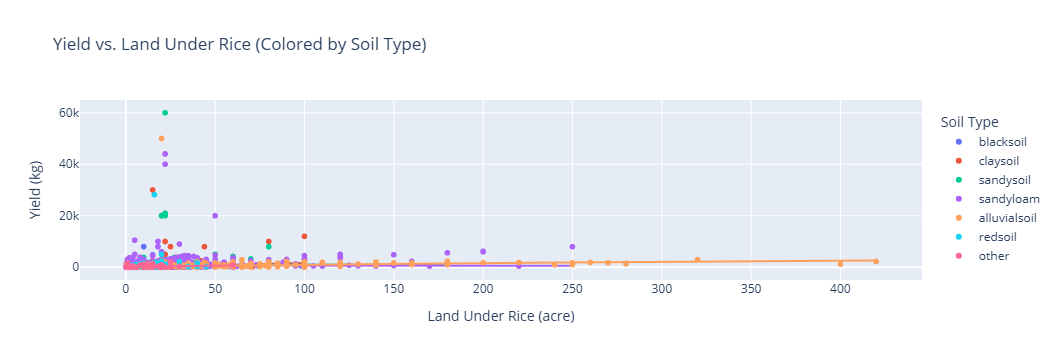

In [122]:
import plotly.express as px

import plotly.express as px

fig = px.scatter(
    df,
    x='land_under_rice_llu', 
    y='yield_kg',
    color='soil_type',  # Adds color grouping + legend
    trendline='lowess',  # Smooth trendline
    title='Yield vs. Land Under Rice (Colored by Soil Type)',
    labels={
        'land_under_rice_llu': 'Land Under Rice (acre)', 
        'yield_kg': 'Yield (kg)',
        'soil_type': 'Soil Type'  # Legend title
    }
)

# Customize legend position (optional)
fig.update_layout(
    legend_title_text='Soil Type',  # Explicit legend title
    legend=dict(
        x=1.02,  # Places legend outside the plot (right side)
        y=0.5,
        bgcolor='rgba(255,255,255,0.5)'  # Semi-transparent background
    )
)

fig.show()

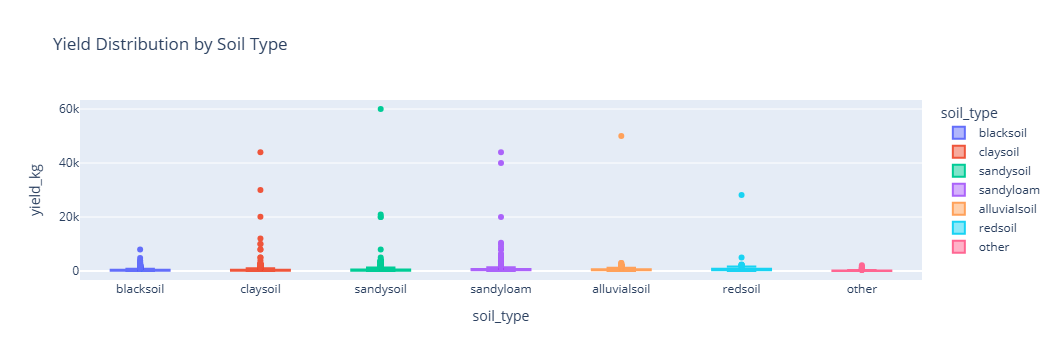

In [118]:
fig = px.box(
    df,
    x='soil_type',  # Replace with your column name
    y='yield_kg',
    color='soil_type',
    title='Yield Distribution by Soil Type'
)
fig.show()

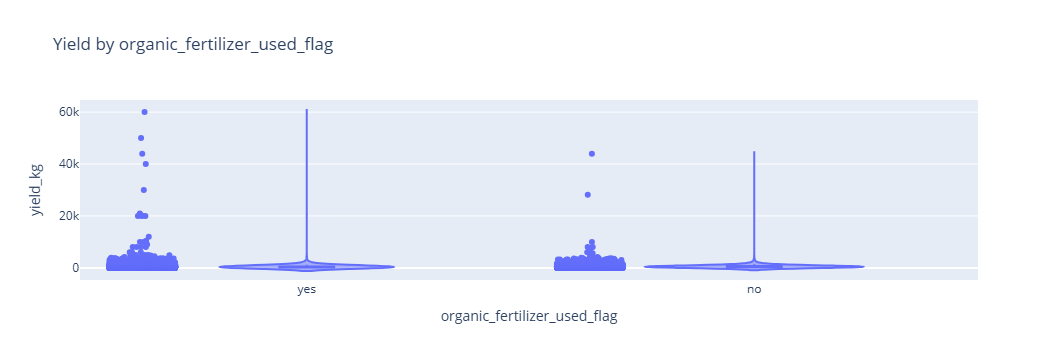

In [124]:
fig = px.violin(
    df,
    x='organic_fertilizer_used_flag',  # Replace with your column name
    y='yield_kg',
    box=True,  # Adds box plot inside
    points='all',
    title='Yield by organic_fertilizer_used_flag'
)
fig.show()